# EDA for Images in Long Normalized Format

Those are images as they come out the `image-prep.ipynb` notebook.

In [24]:
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

plt.style.use('dark_background')

### Notebook parameters

In [25]:
data_folder = 'data/cat_attack_gray_vvvsmall'
zoom = 20 # if None we don't zoom
original_image = 'cat-attack.jpeg'

## Data loading

In [26]:
# load information about the transformed data
with open(data_folder+'/meta.json', 'r') as f:
    metadata = json.load(f)
    
# load the img arrays
with np.load(data_folder+'/pic_long.npz') as data:
    pic_long_norm = data['pic_long_norm']
    pix_loc_norm = data['pix_loc_long_norm']

In [27]:
height, width, n_channels = metadata['target_size']
metadata

{'image_path': 'data/cat-attack.jpeg',
 'original_size': [1024, 768, 1],
 'target_size': [5, 3, 1],
 'color_mode': 'grayscale',
 'resize_factor': 0.005,
 'out_folder': 'cat_attack_gray_vvvsmall',
 'av_color': [94.26667022705078]}

## Information about the data

In [28]:
print("pix_loc_norm is a tensor:", pix_loc_norm.shape)
print("pic_long_norm is a tensor:", pic_long_norm.shape)

pix_loc_norm is a tensor: (15, 2)
pic_long_norm is a tensor: (15, 1)


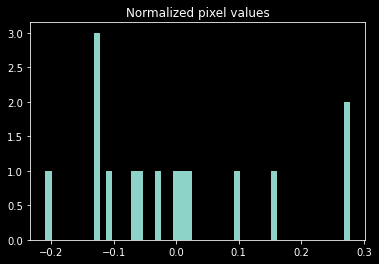

In [29]:
plt.hist(pic_long_norm.reshape(-1), bins=50)
plt.title("Normalized pixel values")
None

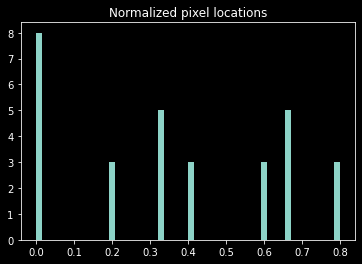

In [30]:
plt.hist(pix_loc_norm.reshape(-1), bins=50)
plt.title("Normalized pixel locations")
None

In [31]:
# de-normalize then visualize the image
print("De-normalized image.")
av_color = np.array(metadata['av_color'])
image.array_to_img(
    255*pic_long_norm.reshape(metadata['target_size'])+av_color[np.newaxis,:])

De-normalized image.


De-normalized image, zoomed in.


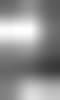

In [32]:
# de-normalize then visualize the image + zoom
print("De-normalized image, zoomed in.")
av_color = np.array(metadata['av_color'])
pil = image.array_to_img(
    255*pic_long_norm.reshape(metadata['target_size'])+av_color[np.newaxis,:])
pil.resize(size=(width*zoom, height*zoom))

## Data testing

```python
# testing that the 2 formats of the array contains the same information
print("Testing pic and pic_long conversion...")
np.testing.assert_array_equal(
    pic_long.reshape(height, width, 3),
    pic)
print("Ok.")
```

```python
# For any pixel index i we get pixel locations (py, px) in pix_loc_long.
# Then we get a pixel value pv1 in pic[py, px].
# We also get another pixel value pv2 in pic_long[i].
# We must have pv1 = pv2.
print("Testing that pix_loc_long and pic_long represent pic faithfully...")
n_tests = 50# number of pixel values to test
# choose randomly the pixels to test
test_indices = np.random.choice(pix_loc_long.shape[0], n_tests, replace=False)
for i in test_indices:
    this_pix_y, this_pix_x = pix_loc_long[i]
    np.testing.assert_array_equal(
        pic_long[i], pic[this_pix_y, this_pix_x])
print("Ok.")
```